# MSIN0097 Predictive Analytics - Individual Coursework
### Anonymous Candidate Number : LQTS5

# Introduction

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer).

#### Input Variables (Physicochemical Tests)
1. **Fixed Acidity**
2. **Volatile Acidity**
3. **Citric Acid**
4. **Residual Sugar**
5. **Chlorides**
6. **Free Sulfur Dioxide**
7. **Total Sulfur Dioxide**
8. **Density**
9. **pH**
10. **Sulphates**
11. **Alcohol**

#### Output Variable (Sensory Data)
12. **Quality** (Score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np

df_white_wine = pd.read_csv('/Users/imryana/Desktop/UCL/Predictive Analytics/Individual Coursework/dataset/winequality/winequality-white.csv', delimiter=';')
df_red_wine = pd.read_csv('/Users/imryana/Desktop/UCL/Predictive Analytics/Individual Coursework/dataset/winequality/winequality-red.csv', delimiter=';')

In [2]:
df_white_wine.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df_white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df_red_wine.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df_red_wine.head()

#Rescale 'quality' to 0 to 6 instead of 3 to 9
df_red_wine['quality'] = df_red_wine['quality'] - 3
df_white_wine['quality'] = df_white_wine['quality'] - 3

## Setting binary variables White (0) and Red (1) wines.

In [4]:
# add 'wine_type' column to 'df_white_wine' dataframe
df_white_wine['wine_type'] = 0
# add 'wine_type' column to 'df_red_wine' dataframe
df_red_wine['wine_type'] = 1

In [5]:
# merge the two dataframes
df_wine = pd.concat([df_white_wine, df_red_wine])

# set 'wine_type' as first column and 'quality' as second column
cols = list(df_wine.columns.values)
cols.pop(cols.index('wine_type'))
cols.pop(cols.index('quality'))
df_wine = df_wine[['wine_type'] + ['quality'] + cols]

# reset the index
df_wine.reset_index(drop=True, inplace=True)

df_wine

,wine_type,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0,3,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,0,3,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,0,3,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,0,3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,0,3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,2,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,1,3,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
6494,1,3,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,1,2,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [6]:
# identifying our target variable
df_wine["quality"].value_counts().sort_index()

quality
0      30
1     216
2    2138
3    2836
4    1079
5     193
6       5
Name: count, dtype: int64

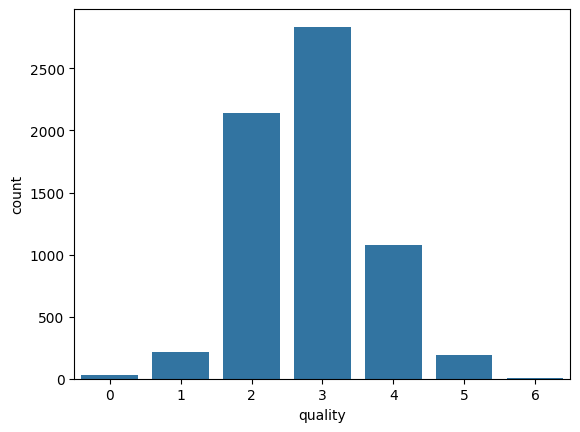

In [7]:
#Plot a histogram of the quality variable
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='quality', data=df_wine)
plt.show()

## Exploratory Data Analysis (EDA)

### Data understanding and summary statistics

In [8]:
df_wine.describe()

,wine_type,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,2.818378,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,0.430779,0.873255,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,0.000000,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,0.000000,2.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,0.000000,3.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,0.000000,3.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,1.000000,6.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


### Box Plot to identify outliers in dataset.

From the summary statistics, potential outliers include:

* Residual Sugar
* Chlorides
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Sulphates

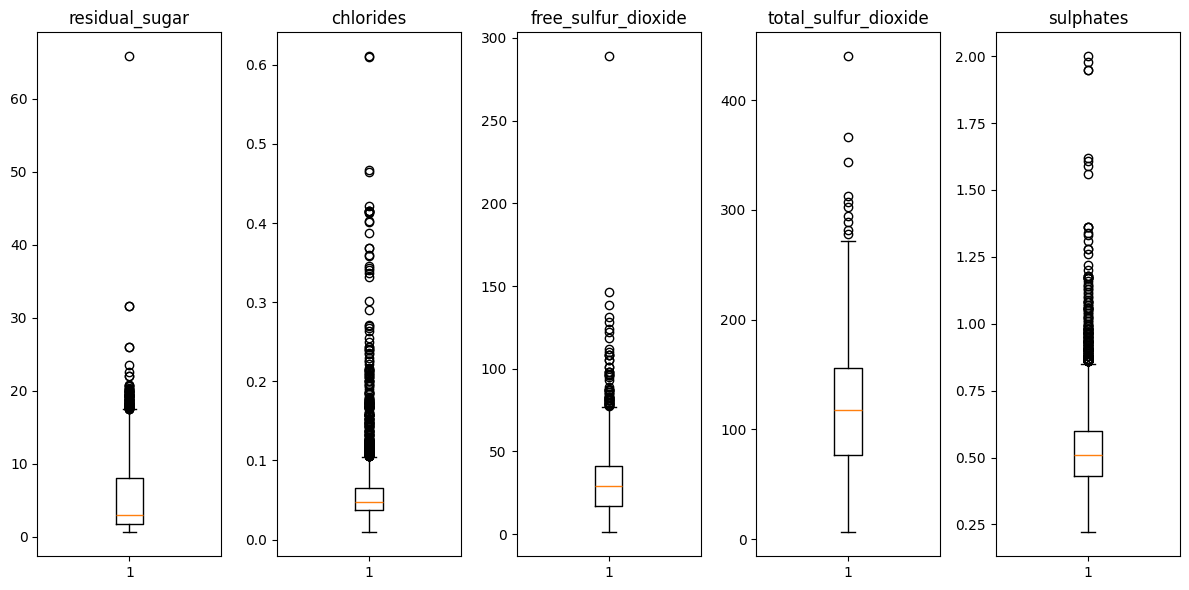

In [9]:
import matplotlib.pyplot as plt

# Columns to check for outliers
outlier_columns = ['residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates']

# Create boxplots for each of the outlier-prone columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, len(outlier_columns), i)
    plt.boxplot(df_wine[col])
    plt.title(col)
plt.tight_layout()
plt.show()

For now, we will keep the outliers in the dataset as some models handle outliers well.

### Univariate Analysis

#### Histogram to understand distribution of data

<Figure size 1200x800 with 0 Axes>

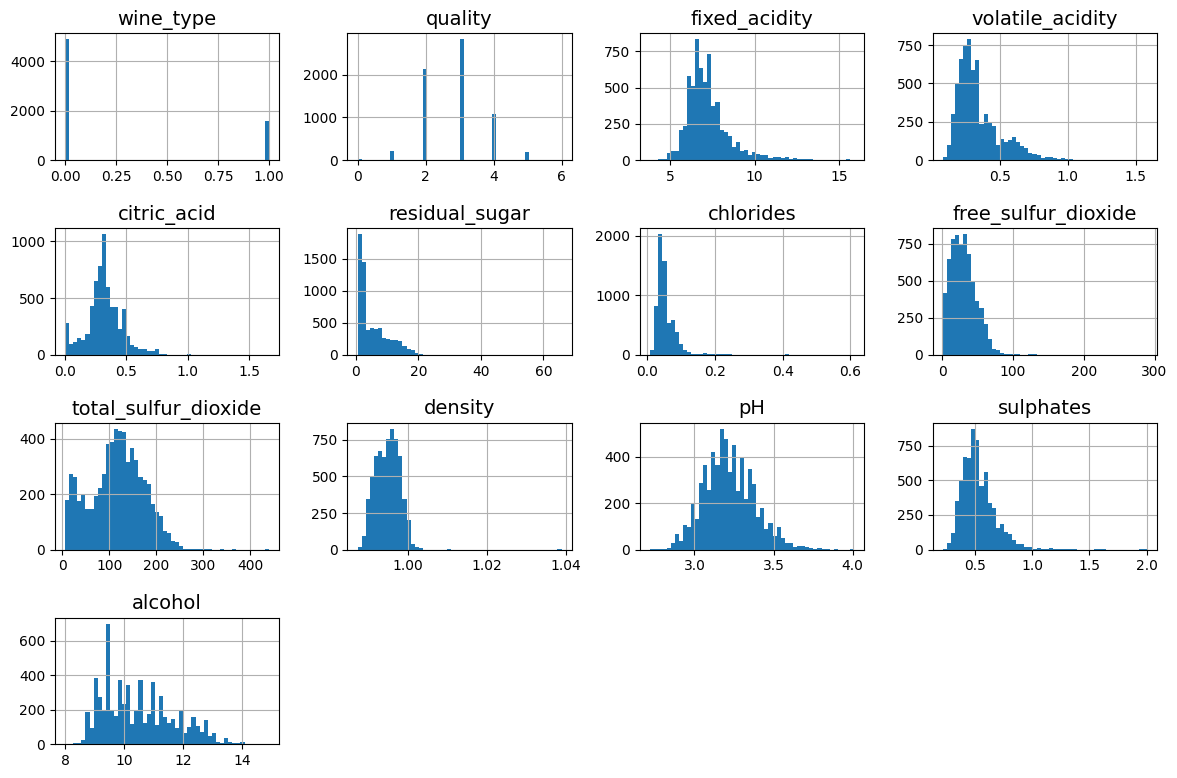

In [10]:
import matplotlib.pyplot as plt
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.figure(figsize=(12, 8))
df_wine.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

### Feature Engineering and Looking for Correlations

#### Experimenting with Attribute Combinations




Citric Acidity Ratios: The balance between different acidity components can be key for wine quality.

$$
\text{Citric Acidity Ratio} = \frac{\text{citric\_acid}}{\text{fixed\_acidity}}
$$




Sulfur Dioxide Ratios: Affects wine preservation and taste. Sulfur Dioxide Ratios affects wine preservation and taste.

$$
\text{Sulfur Dioxide Ratio} = \frac{\text{free\_sulfur\_dioxide}}{\text{total\_sulfur\_dioxide}}
$$




In [11]:
df_wine['citric_acidity_ratio'] = df_wine['citric_acid']/df_wine['fixed_acidity']
df_wine['sulfur_dioxide_ratio'] = df_wine['free_sulfur_dioxide']/df_wine['total_sulfur_dioxide']

df_wine.head()

,wine_type,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,citric_acidity_ratio,sulfur_dioxide_ratio
0,0,3,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0.051429,0.264706
1,0,3,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0.053968,0.106061
2,0,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0.049383,0.309278
3,0,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0.044444,0.252688
4,0,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0.044444,0.252688


### Correlation of Input variables with Quality

In [12]:
corr_matrix = df_wine.corr(numeric_only=True)
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric_acidity_ratio    0.122152
sulfur_dioxide_ratio    0.116287
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
wine_type              -0.119323
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

### PCA - Principal Component Analysis (Dimensionality Reduction)

In [13]:
# Perform PCA on the dataset df_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X = df_wine.drop(columns=['quality'])
X = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

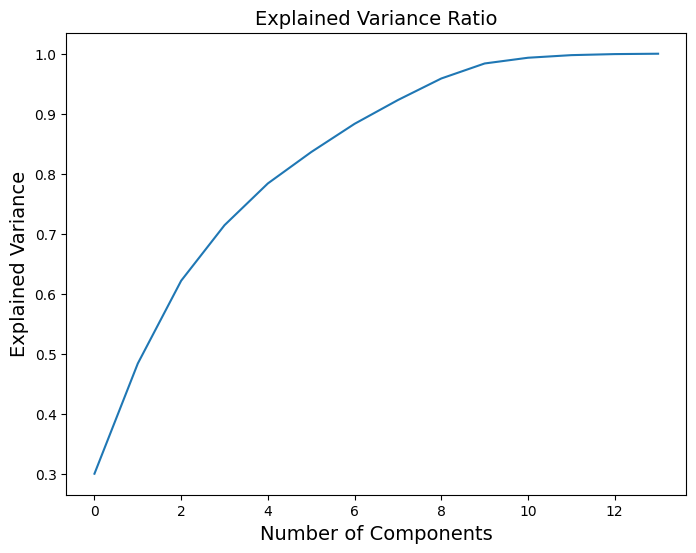

In [14]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

#### Choosing the right number of Dimensions

In [15]:
# Select the number of components that explain at least 95% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components: {n_components}")

Number of components: 9


In [16]:
# Perform PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

In [17]:
# Create a new dataframe with the PCA components
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i + 1}' for i in range(n_components)])
df_pca['quality'] = df_wine['quality']

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,quality
0,-2.262034,3.141425,-1.736948,-0.534034,-0.720621,-0.929598,0.032412,0.504576,1.152671,3
1,-0.654628,-0.507601,0.247498,-1.283831,1.567857,0.144820,-0.417966,-0.761259,-0.331367,3
2,-0.457295,0.408101,0.341280,-0.069695,-0.331256,-0.634808,-0.464181,-0.495420,-0.108270,3
3,-1.674423,0.665003,-0.883335,-0.018209,-0.181453,0.251276,-0.186894,-0.169214,-0.355562,3
4,-1.674423,0.665003,-0.883335,-0.018209,-0.181453,0.251276,-0.186894,-0.169214,-0.355562,3


## Data Preprocessing

### Create a Scaled Dataframe for certain Models that work better with scaled data

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

#Fit and transform df_wine to df_wine_scaled except for target variables
df_wine_scaled = df_wine.copy()
df_wine_scaled[df_wine.columns[2:]] = scaler.fit_transform(df_wine[df_wine.columns[2:]])

### Train-test split

#### Unscaled Data Preparation

The evaluation of the final model will always be conducted on a test set that has not been used during training process.

In [19]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_wine_scaled, test_size=0.25, random_state=42)

# Create train test split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(df_wine.drop(columns=['quality']), df_wine['quality'], test_size=0.25, random_state=42)

# Create a validation set
Xt_log, Xv_log, yt_log, yv_log = train_test_split(X_train_log, y_train_log, test_size=0.25, random_state=42)

#### Scaled Data Preparation

In [20]:
df_train_scaled, df_test_scaled = train_test_split(df_wine_scaled, test_size=0.25, random_state=42)

# Create train test split for scaled data
X_train_scaled_log, X_test_scaled_log, y_train_scaled_log, y_test_scaled_log = train_test_split(df_wine_scaled.drop(columns=['quality']), df_wine_scaled['quality'], test_size=0.25, random_state=42)

# Create a validation set for scaled data
Xt_scaled_log, Xv_scaled_log, yt_scaled_log, yv_scaled_log = train_test_split(X_train_scaled_log, y_train_scaled_log, test_size=0.25, random_state=42)

### Logistic Regression Model on un-scaled data

In [21]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(Xt_log, yt_log)

/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

#### Using cross validation to evaluate Logistic Regession Model

In [22]:
from sklearn.model_selection import cross_val_score, cross_val_predict
# Cross-validation
accuracies = cross_val_score(logistic_model, Xt_log, yt_log, cv=5, scoring='accuracy')

/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [23]:
print(f"Accuracy of Logistic Regression model on validation set for un-scaled data: {logistic_model.score(Xv_log, yv_log)*100:.2f}%")
print(f"Accuracy of Logistic Regression model on test set for un-scaled data: {logistic_model.score(X_test_log, y_test_log)*100:.2f}%")  
print(f"Cross-validation accuracy: {accuracies.mean()*100:.2f}%")

Accuracy of Logistic Regression model on validation set for un-scaled data: 51.31%
Accuracy of Logistic Regression model on test set for un-scaled data: 52.06%
Cross-validation accuracy: 50.93%


### Logistic Regression Model on scaled data

In [24]:
logistic_model.fit(Xt_scaled_log, yt_scaled_log)

LogisticRegression(max_iter=500)

#### Using cross validation to evaluate scaled Logistic Regession Model

In [25]:
print(f"Accuracy of Logistic Regression model on validation set for scaled data: {logistic_model.score(Xv_scaled_log, yv_scaled_log)*100:.2f}%")
print(f"Accuracy of Logistic Regression model on test set for scaled data: {logistic_model.score(X_test_scaled_log, y_test_scaled_log)*100:.2f}%")

from sklearn.model_selection import cross_val_score, cross_val_predict
accuracies = cross_val_score(logistic_model, Xt_scaled_log, yt_scaled_log, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy (5 folds): {accuracies.mean()*100:.2f}%")

Accuracy of Logistic Regression model on validation set for scaled data: 54.84%
Accuracy of Logistic Regression model on test set for scaled data: 54.83%
Cross-validation accuracy (5 folds): 54.27%


### Logistic Regression Model with PCA Components

In [26]:
# Run logistic regression on PCA components
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca.drop(columns='quality'), df_pca['quality'], test_size=0.2, random_state=42)

# Create a validation test split
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the logistic regression model to PCA components
logistic_model.fit(Xt, yt)

LogisticRegression(max_iter=500)

In [27]:
print(f"Accuracy of PCA Logistic Regression model on validation set: {logistic_model.score(Xv, yv)*100:.2f}%")
print(f"Accuracy of PCA Logistic Regression model on test set for scaled data: {logistic_model.score(X_train, y_train)*100:.2f}%")

from sklearn.model_selection import cross_val_score, cross_val_predict
accuracies = cross_val_score(logistic_model, Xt_scaled_log, yt_scaled_log, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy (5 folds): {accuracies.mean()*100:.2f}%")

Accuracy of PCA Logistic Regression model on validation set: 54.81%
Accuracy of PCA Logistic Regression model on test set for scaled data: 53.68%
Cross-validation accuracy (5 folds): 54.27%


### Fine Tuning the Logistic Regression Model using a Grid Search

In [28]:
#define hyperparameters grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

from sklearn.model_selection import GridSearchCV

# Initialize the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(Xt_scaled_log, yt_scaled_log)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, sol

/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.8s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.8s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.5s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.8s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.8s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.9s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.6s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.5s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.6s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.4s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.8s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.8s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.6s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.8s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.5s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.8s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/

[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.4s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.5s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.9s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.8s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.8s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.6s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   1.4s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   1.7s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.5s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.8s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.7s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.8s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.8s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ...............C=1000, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ...............C=1000, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ...............C=1000, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ....................C=1000, penalty=l1, solver=saga; total time=   0.8s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.8s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.5s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....................C=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.1s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END ....................C=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.6s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.8s
[CV] END ....................C=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END ....................C=1000, penalty=l2, solver=saga; total time=   0.5s


/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END ....................C=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END ....................C=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END ...............C=1000, penalty=l1, solver=liblinear; total time=   3.3s
[CV] END ...............C=1000, penalty=l1, solver=liblinear; total time=   7.7s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [29]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


### Initialise Logistic Regression Model with best hyperparameters based on Grid Search

In [30]:
# Initialize the Logistic Regression model with the best parameters
tuned_logistic_model = LogisticRegression(C=10, penalty='l1', solver='liblinear', max_iter=500)

# Fit the model to the training data
tuned_logistic_model.fit(Xt_scaled_log, yt_scaled_log)

# Evaluate the model on the test data
print(f"Accuracy of Tuned Logistic Regression model on validation set: {tuned_logistic_model.score(Xv_scaled_log, yv_scaled_log)*100:.2f}%")
print(f"Accuracy of Tuned Logistic Regression model on test set: {tuned_logistic_model.score(X_test_scaled_log, y_test_scaled_log)*100:.2f}%")
accuracies = cross_val_score(tuned_logistic_model, Xt_scaled_log, yt_scaled_log, cv=5, scoring='accuracy')
print(f"Cross-validated accuracies (5 folds): {np.mean(accuracies)}")

Accuracy of Tuned Logistic Regression model on validation set: 54.52%
Accuracy of Tuned Logistic Regression model on test set: 55.75%
Cross-validated accuracies (5 folds): 0.5437838952082904


### Where are we misclassifying points for Tuned Logistic Model?


In [31]:
# Creating an array of predicted values
y_pred_logistic = cross_val_predict(tuned_logistic_model, X_train_scaled_log, y_train_scaled_log, cv=5)
predicted_correctly_mask = y_pred_logistic == y_train_scaled_log
not_predicted_correctly = ~predicted_correctly_mask

In [32]:
df_predictions_log = df_train_scaled.copy()

df_predictions_log['correct_prediction'] = predicted_correctly_mask
df_predictions_log['logistic_predicted'] = y_pred_logistic
df_predictions_log

,wine_type,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,citric_acidity_ratio,sulfur_dioxide_ratio,correct_prediction,logistic_predicted
1539,0,3,0.065333,-0.483928,1.179346,-0.093167,-0.800261,0.083090,-0.154723,-0.365735,0.133722,0.058683,0.258422,1.157576,0.098668,True,3
1109,0,1,1.531004,-0.726906,0.559966,-0.639680,-0.058059,-0.705730,0.623797,0.167876,-1.110254,-0.478971,-0.999313,-0.047553,-1.344425,False,2
100,0,2,0.142473,-0.544672,0.353506,1.693509,0.113218,1.209975,1.349236,0.934941,-1.359049,-0.613385,-1.167011,0.284844,-0.127850,True,2
5477,1,3,2.610973,-0.180205,1.179346,-0.681719,0.198857,-0.705730,-1.340197,0.968292,-0.488266,-0.142937,-0.580068,0.092514,1.309679,True,3
6416,1,2,0.142473,0.791708,0.972886,-0.681719,1.654714,-1.325517,-1.694069,0.591429,0.631312,0.663545,0.006875,0.904720,0.507337,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,3,-0.706073,-0.605417,-0.197054,1.735549,-0.600437,1.266319,0.323005,0.324624,-0.301669,-1.016626,0.090724,0.082592,0.872583,True,3
5191,1,3,-0.243230,0.123518,-0.472334,-0.639680,1.197975,-1.438205,-1.764844,0.568084,1.191102,0.461924,-0.328521,-0.416883,0.206459,True,3
5226,1,3,4.770910,-0.423183,2.074005,-0.597640,0.741235,-1.381861,-1.676376,1.835408,-0.363868,0.932372,-0.663917,0.094667,-0.008454,True,3
5390,1,4,1.299582,0.366496,1.316985,-0.597640,-0.115152,-0.987451,-1.570214,0.101175,0.631312,2.478129,2.438496,0.657079,1.562268,True,4


### Plotting Predicted vs Actual points of Logistic Regression on Scatter Plot

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a consistent color palette
quality_colors = {
    0: "blue",
    1: "orange",
    2: "green",
    3: "red",
    4: "purple",
    5: "brown",
    6: "pink"
}

# Defining a function to execute plots for different variables
def plot_incorrect_predictions_log(df_predictions_log, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()

    # Apply the same color mapping for both actual and predicted quality
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='logistic_predicted', 
                    data=df_predictions_log, palette=quality_colors, ax=axs[0])

    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='quality', 
                    data=df_predictions_log, palette=quality_colors, ax=axs[1])

    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='correct_prediction', 
                    data=df_predictions_log, ax=axs[2])

    axs[3].set_visible(False)  # Hide empty subplot

    plt.show()

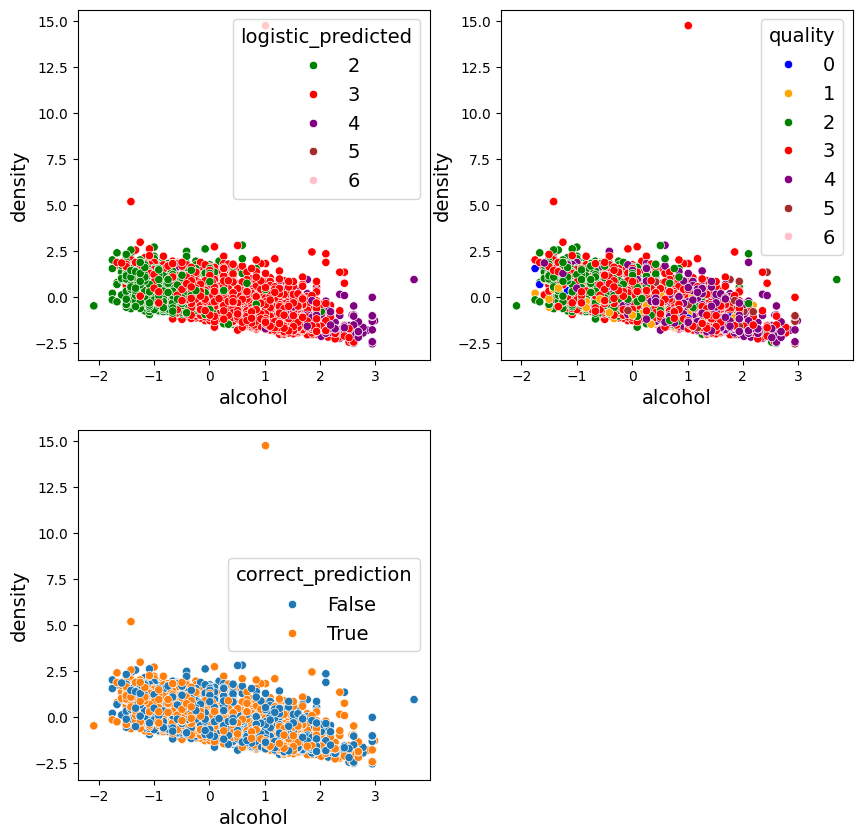

In [34]:
plot_incorrect_predictions_log(df_predictions_log, 'alcohol', 'density')

### Confusion matrix of Logistic Regression on scaled data

In [35]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_scaled_log, y_pred_logistic)

array([[   0,    0,   14,   10,    0,    1,    0],
       [   0,    0,  103,   59,    1,    0,    0],
       [   0,    0, 1007,  601,    5,    0,    0],
       [   0,    0,  498, 1535,   67,    0,    2],
       [   0,    0,   47,  640,  123,    0,    0],
       [   0,    0,   16,  111,   27,    0,    0],
       [   0,    0,    0,    1,    4,    0,    0]])

## Random Forest Classifier

Unlike models that rely on distance calculations like Logistic Regression, Random Forest and other tree-based models are invariant to feature scaling. Therefore, I will use unscaled data for this model.

In [36]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Train test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_wine.drop(columns=['quality']), df_wine['quality'], test_size=0.25, random_state=42)

# Create a validation set
Xt_rf, Xv_rf, yt_rf, yv_rf = train_test_split(X_train_rf, y_train_rf, test_size=0.25, random_state=42)

In [37]:
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(Xt_rf, yt_rf)

RandomForestClassifier(random_state=42)

#### Using cross validation to evaluate Random Forest Model

In [38]:
print(f"Accuracy of Random Forest model on validation set: {rf_base.score(Xv_rf, yv_rf)*100:.2f}%")
print(f"Accuracy of Random Forest model on test set: {rf_base.score(X_test_rf, y_test_rf)*100:.2f}%")

#Cross-validation
accuracies_rf_base = cross_val_score(rf_base, Xt_rf, yt_rf, cv=5, scoring='accuracy')
print(f"Cross-validated accuracies (5 folds): {np.mean(accuracies_rf_base)}")

Accuracy of Random Forest model on validation set: 65.52%
Accuracy of Random Forest model on test set: 66.52%
Cross-validated accuracies (5 folds): 0.6376571781946292


In [39]:
from sklearn.metrics import classification_report

y_pred_rf = rf_base.predict(X_test_rf)
print(classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.70      0.13      0.22        53
           2       0.67      0.71      0.69       525
           3       0.65      0.77      0.71       734
           4       0.73      0.46      0.56       269
           5       0.90      0.23      0.37        39

    accuracy                           0.67      1625
   macro avg       0.61      0.38      0.42      1625
weighted avg       0.67      0.67      0.65      1625



/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/imryana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

#### Tuning Random Forest Model with Features Importance

In [40]:
features = pd.DataFrame(rf_base.feature_importances_, index=df_wine.drop(columns=['quality']).columns, columns=['Importance'])
features.sort_values(by='Importance', ascending=False)

,Importance
alcohol,0.110162
volatile_acidity,0.088749
density,0.084934
sulfur_dioxide_ratio,0.081968
citric_acidity_ratio,0.077957
total_sulfur_dioxide,0.075953
chlorides,0.073282
sulphates,0.072627
pH,0.070644
residual_sugar,0.070076


In [41]:
# Drop features with low importance score of less than 0.05
features_to_drop = features[features['Importance'] < 0.05].index
X_reduced = df_wine.drop(columns=['quality']).drop(columns=features_to_drop)

# Train test split
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, df_wine['quality'], test_size=0.25, random_state=42)

# Create a validation set
Xt_reduced, Xv_reduced, yt_reduced, yv_reduced = train_test_split(X_train_reduced, y_train_reduced, test_size=0.25, random_state=42)

#### Initializing Random Forest Classifier with dropped features.

In [42]:
# Initialize the random forest classifier
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(Xt_reduced, yt_reduced)

RandomForestClassifier(random_state=42)

In [43]:
print(f"Accuracy of Reduced Random Forest model on validation set: {rf_reduced.score(Xv_reduced, yv_reduced)*100:.2f}%")
print(f"Accuracy of Reduced Random Forest model on test set: {rf_reduced.score(X_test_reduced, y_test_reduced)*100:.2f}%")

#Cross-validation
accuracies_rf_reduced = cross_val_score(rf_reduced, Xt_reduced, yt_reduced, cv=5, scoring='accuracy')
print(f"Cross-validated accuracies (5 folds): {np.mean(accuracies_rf_reduced)}")

Accuracy of Reduced Random Forest model on validation set: 65.02%
Accuracy of Reduced Random Forest model on test set: 66.15%
Cross-validated accuracies (5 folds): 0.6414864231771077


#### Tuning Random Forest Regressor with Bayesian Optimisation

In [44]:
%pip install scikit-optimize
from skopt import BayesSearchCV

# Define the hyperparameter grid
param_grid = {'n_estimators': (10, 1000),
              'max_depth': (1, 100),
              'min_samples_split': (2, 10),
              'min_samples_leaf': (1, 10)}

# Initialize the BayesSearchCV object with 5-fold cross-validation
bayes_search = BayesSearchCV(estimator=rf_base, search_spaces=param_grid, n_iter=32, cv=5, n_jobs=-1, verbose=2)

# Fit the BayesSearchCV object to the data
bayes_search.fit(Xt_rf, yt_rf)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=7, n_estimators=379; total time=   1.4s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=7, n_estimators=379; total time=   1.4s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=7, n_estimators=379; total time=   1.4s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=7, n_estimators=379; total time=   1.4s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=7, n_estimators=379; total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=82, min_samples_leaf=8, min_samples_split=9, n_estimators=696; total time=   2.2s
[C

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_iter=32, n_jobs=-1,
              search_spaces={'max_depth': (1, 100), 'min_samples_leaf': (1, 10),
                             'min_samples_split': (2, 10),
                             'n_estimators': (10, 1000)},
              verbose=2)

In [45]:
print(f"Best parameters: {bayes_search.best_params_}")

Best parameters: OrderedDict([('max_depth', 62), ('min_samples_leaf', 1), ('min_samples_split', 5), ('n_estimators', 1000)])


#### Initialize Random Forest model with the best parameters identified by Bayes Search

In [46]:
# Initialize the Random Forest model with the best parameters
rf_bayes = RandomForestClassifier(n_estimators=1000, max_depth=62, min_samples_split=5, min_samples_leaf=1, random_state=42)

# Fit the model to the training data
rf_bayes.fit(Xt_rf, yt_rf)

RandomForestClassifier(max_depth=62, min_samples_split=5, n_estimators=1000,
                       random_state=42)

In [47]:
# Evaluate the model on the test data
print(f"Accuracy of Bayes tuned Random Forest Model on validation set: {rf_bayes.score(Xv_rf, yv_rf)*100:.2f}%")
print(f"Accuracy of Bayes tuned Random Forest model on test set: {rf_bayes.score(X_test_rf, y_test_rf)*100:.2f}%")

#Cross-validation
accuracies_rf_bayes = cross_val_score(rf_bayes, Xt_rf, yt_rf, cv=5, scoring='accuracy')
print(f"Cross-validated accuracies (5 folds): {np.mean(accuracies_rf_bayes)}")

Accuracy of Bayes tuned Random Forest Model on validation set: 66.17%
Accuracy of Bayes tuned Random Forest model on test set: 65.54%
Cross-validated accuracies (5 folds): 0.6439499278526319


The Bayes tuned Random Forest Model produced the highest cross validated accuracy. We will now plot the residuals of the bayes tuned Random Forest Model to see where the model predicted wrongly.

In [48]:
# Creating an array of predicted values
y_pred_rf = cross_val_predict(rf_bayes, X_train_rf, y_train_rf, cv=5)
predicted_correctly_mask_rf = y_pred_rf == y_train_rf
not_predicted_correctly_rf = ~predicted_correctly_mask_rf

In [49]:
# Create new dataframe to store Random Forest (Bayes-tuned) Predictions
df_predictions_rf = df_train.copy()

df_predictions_rf['correct_prediction'] = predicted_correctly_mask_rf
df_predictions_rf['rf_predicted'] = y_pred_rf
df_predictions_rf

,wine_type,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,citric_acidity_ratio,sulfur_dioxide_ratio,correct_prediction,rf_predicted
1539,0,3,0.065333,-0.483928,1.179346,-0.093167,-0.800261,0.083090,-0.154723,-0.365735,0.133722,0.058683,0.258422,1.157576,0.098668,True,3
1109,0,1,1.531004,-0.726906,0.559966,-0.639680,-0.058059,-0.705730,0.623797,0.167876,-1.110254,-0.478971,-0.999313,-0.047553,-1.344425,False,2
100,0,2,0.142473,-0.544672,0.353506,1.693509,0.113218,1.209975,1.349236,0.934941,-1.359049,-0.613385,-1.167011,0.284844,-0.127850,True,2
5477,1,3,2.610973,-0.180205,1.179346,-0.681719,0.198857,-0.705730,-1.340197,0.968292,-0.488266,-0.142937,-0.580068,0.092514,1.309679,False,2
6416,1,2,0.142473,0.791708,0.972886,-0.681719,1.654714,-1.325517,-1.694069,0.591429,0.631312,0.663545,0.006875,0.904720,0.507337,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,3,-0.706073,-0.605417,-0.197054,1.735549,-0.600437,1.266319,0.323005,0.324624,-0.301669,-1.016626,0.090724,0.082592,0.872583,True,3
5191,1,3,-0.243230,0.123518,-0.472334,-0.639680,1.197975,-1.438205,-1.764844,0.568084,1.191102,0.461924,-0.328521,-0.416883,0.206459,True,3
5226,1,3,4.770910,-0.423183,2.074005,-0.597640,0.741235,-1.381861,-1.676376,1.835408,-0.363868,0.932372,-0.663917,0.094667,-0.008454,True,3
5390,1,4,1.299582,0.366496,1.316985,-0.597640,-0.115152,-0.987451,-1.570214,0.101175,0.631312,2.478129,2.438496,0.657079,1.562268,True,4


In [50]:
# Defining a function to execute plots for different variables
# Defining a function to execute plots for different variables
def plot_incorrect_predictions_rf(df_predictions_rf, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()

    # Apply the same color mapping for both actual and predicted quality
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='rf_predicted', 
                    data=df_predictions_rf, palette=quality_colors, ax=axs[0])

    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='quality', 
                    data=df_predictions_rf, palette=quality_colors, ax=axs[1])

    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='correct_prediction', 
                    data=df_predictions_rf, ax=axs[2])

    axs[3].set_visible(False)  # Hide empty subplot

    plt.show()

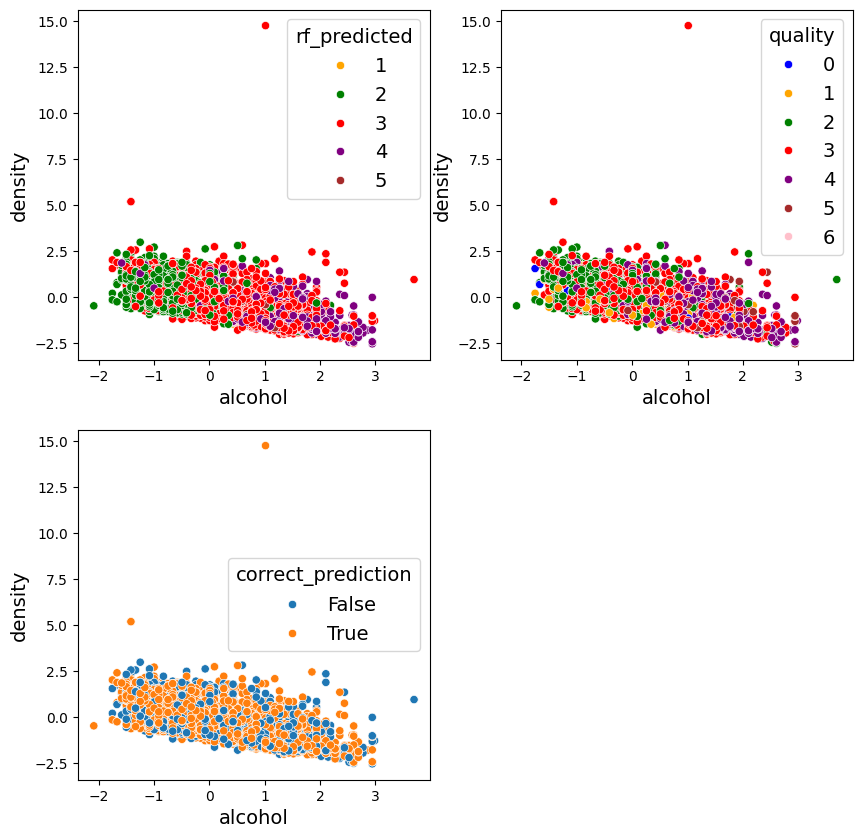

In [51]:
plot_incorrect_predictions_rf(df_predictions_rf, 'alcohol', 'density')

#### Confusion Matrix of Random Forest

In [52]:
# Confusion matrix
confusion_matrix(y_train_rf, y_pred_rf)

array([[   0,    0,   11,   13,    1,    0,    0],
       [   0,   11,  107,   44,    1,    0,    0],
       [   0,    2, 1132,  465,   14,    0,    0],
       [   0,    2,  334, 1653,  111,    2,    0],
       [   0,    0,   20,  391,  396,    3,    0],
       [   0,    0,    0,   55,   42,   57,    0],
       [   0,    0,    0,    3,    2,    0,    0]])

## Neural Network Model using Classification Multilayer Perceptron (MLP)

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [54]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
    def __init__(self, in_features=14, h1=8, h2=8, h3=8, out_features=7): # 8 neurons in each layer, 14 features and 7 classes
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        
        return x

In [55]:
# Pick a manual seed for reproducibility
torch.manual_seed(42)

# Create an instance of the model
model = Model()

#### Train-test split and convert data to tensor format

In [56]:
# Run the model on scaled data

# Train test split
X_nn = df_wine_scaled.drop(columns=['quality'])
y_nn = df_wine_scaled['quality']

# Convert to numpy array
X_nn = X_nn.to_numpy()
y_nn = y_nn.to_numpy()

# Train test split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.25, random_state=42)

# Create validation split
Xt_nn, Xv_nn, yt_nn, yv_nn = train_test_split(X_train_nn, y_train_nn, test_size=0.25, random_state=42)

#Convert to tensor
X_train_nn = torch.FloatTensor(X_train_nn)
X_test_nn = torch.FloatTensor(X_test_nn)
Xt_nn = torch.FloatTensor(Xt_nn)
Xv_nn = torch.FloatTensor(Xv_nn)
y_train_nn = torch.LongTensor(y_train_nn)
y_test_nn = torch.LongTensor(y_test_nn)
yt_nn = torch.LongTensor(yt_nn)
yv_nn = torch.LongTensor(yv_nn)


#### Training the Neural Network

In [57]:
# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 250
losses = []

for i in range(epochs):
    y_pred_nn = model.forward(X_train_nn)
    loss = criterion(y_pred_nn, y_train_nn)
    losses.append(loss) # Keep track of the loss
    
    if i % 10 == 0:
        print(f'Epoch {i} and loss is: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.8026361465454102
Epoch 10 and loss is: 1.5885826349258423
Epoch 20 and loss is: 1.4287540912628174
Epoch 30 and loss is: 1.3302971124649048
Epoch 40 and loss is: 1.3035222291946411
Epoch 50 and loss is: 1.285848617553711
Epoch 60 and loss is: 1.273629903793335
Epoch 70 and loss is: 1.2626312971115112
Epoch 80 and loss is: 1.2518256902694702
Epoch 90 and loss is: 1.2390165328979492
Epoch 100 and loss is: 1.223525881767273
Epoch 110 and loss is: 1.2071747779846191
Epoch 120 and loss is: 1.1918293237686157
Epoch 130 and loss is: 1.1782712936401367
Epoch 140 and loss is: 1.1662176847457886
Epoch 150 and loss is: 1.152857780456543
Epoch 160 and loss is: 1.1303982734680176
Epoch 170 and loss is: 1.1077287197113037
Epoch 180 and loss is: 1.092174768447876
Epoch 190 and loss is: 1.0786808729171753
Epoch 200 and loss is: 1.068259596824646
Epoch 210 and loss is: 1.0603055953979492
Epoch 220 and loss is: 1.0544393062591553
Epoch 230 and loss is: 1.0503971576690674
Epoch 240

#### Epoch-Loss plot of Neural Network

Text(0.5, 0, 'Epoch')

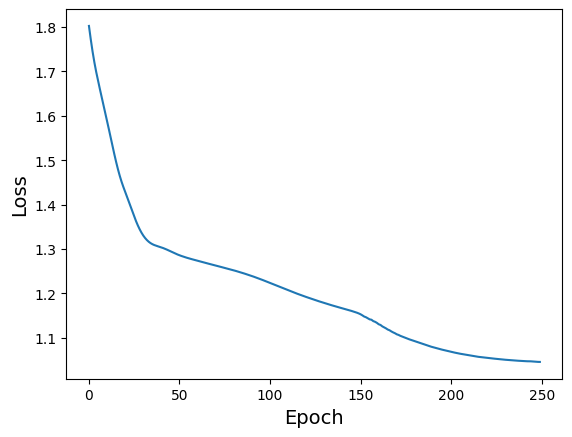

In [58]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [59]:
# Evaluate the model on the test data
with torch.no_grad(): #Turn off back propagation
    y_val = model.forward(X_test_nn)
    loss = criterion(y_val, y_test_nn)
    print(f'Loss on test data: {loss}')

# Evaluate the model on validation data
with torch.no_grad(): #Turn off back propagation
    y_val = model.forward(Xv_nn)
    loss = criterion(y_val, yv_nn)
    print(f'Loss on validation data: {loss}')

Loss on test data: 1.0169848203659058
Loss on validation data: 1.0375137329101562


In [60]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test_nn):
        y_val = model.forward(data)
        
        print(f'{i+1}.) {str(y_val)} \t {y_test_nn [i]}')
        
        # Check if the predicted class is correct
        if y_val.argmax().item() == y_test_nn[i]:
            correct += 1

1.) tensor([-2.8476, -2.2995,  0.6886,  2.7854,  2.7923,  1.1655, -4.4706]) 	 4
2.) tensor([-2.9078, -1.0735,  2.5059,  3.3000,  1.3741, -0.5071, -9.0209]) 	 4
3.) tensor([ -3.2706,  -1.0841,   3.0023,   3.7076,   1.3691,  -0.6083, -10.5470]) 	 3
4.) tensor([ -2.7304,  -0.4743,   3.1024,   3.3168,   0.6907,  -1.2587, -10.3532]) 	 3
5.) tensor([-1.6874,  0.0383,  2.3565,  2.3202,  0.1482, -1.6180, -7.6529]) 	 2
6.) tensor([-2.2429, -2.0497,  0.1892,  2.1904,  2.5325,  1.0211, -2.7393]) 	 4
7.) tensor([-2.1245, -0.9326,  1.6008,  2.4627,  1.2484, -0.4478, -6.1386]) 	 3
8.) tensor([ -1.0076,   1.6764,   3.7129,   2.1453,  -1.7109,  -3.6108, -10.4564]) 	 2
9.) tensor([-1.6945,  0.4837,  2.9958,  2.4903, -0.3663, -2.2209, -9.2419]) 	 2
10.) tensor([-0.8742,  0.2730,  1.5419,  1.4832, -0.0844, -1.6757, -4.9701]) 	 3
11.) tensor([-1.3942,  0.3514,  2.3856,  2.1016, -0.1995, -1.9469, -7.4851]) 	 2
12.) tensor([-2.4874, -1.4683,  1.3553,  2.6793,  1.8498,  0.1592, -5.8273]) 	 3
13.) tensor([-2.

In [61]:
print(f'We got {correct} out of 1625 correct')

# Calculate model accuracy score
accuracy = (correct / len(y_test_nn)*100)
print(f'Accuracy of Neural Network with best Hyperparameters: {accuracy:.2f}%')

We got 907 out of 1625 correct
Accuracy of Neural Network with best Hyperparameters: 55.82%


### Manual Grid Search through for best hyperparameters

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import itertools
import numpy as np

In [63]:
# Define hyperparameter grid
param_grid = {
    'lr': [0.1, 0.01, 0.001],
    'epochs': [100, 250, 500],
    'batch_size': [16, 32, 64],
    'hidden_layers': [(8,8,8), (16,16,16), (32,16,8)],
    'optimizer': ['Adam', 'SGD']
}

# Generate all possible hyperparameter combinations
param_combinations = list(itertools.product(*param_grid.values()))

# Track best model
best_loss = float('inf')
best_params = None

In [64]:
# Grid Search Loop
for params in param_combinations:
    lr, epochs, batch_size, (h1, h2, h3), optimizer_name = params
    print(f"Testing: lr={lr}, epochs={epochs}, batch_size={batch_size}, hidden_layers=({h1},{h2},{h3}), optimizer={optimizer_name}")

    # Create model with the given hyperparameters
    model = Model(in_features=14, h1=h1, h2=h2, h3=h3, out_features=7)

    # Define optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr) if optimizer_name == 'Adam' else optim.SGD(model.parameters(), lr=lr)
    
    # Define loss function
    criterion = nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(epochs):
        y_pred_nn = model(X_train_nn)
        loss = criterion(y_pred_nn, y_train_nn)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate loss
    final_loss = loss.item()
    print(f"Final Loss: {final_loss:.4f}")

    # Save best model
    if final_loss < best_loss:
        best_loss = final_loss
        best_params = params

Testing: lr=0.1, epochs=100, batch_size=16, hidden_layers=(8,8,8), optimizer=Adam
Final Loss: 1.0065
Testing: lr=0.1, epochs=100, batch_size=16, hidden_layers=(8,8,8), optimizer=SGD
Final Loss: 1.3028
Testing: lr=0.1, epochs=100, batch_size=16, hidden_layers=(16,16,16), optimizer=Adam
Final Loss: 0.9654
Testing: lr=0.1, epochs=100, batch_size=16, hidden_layers=(16,16,16), optimizer=SGD
Final Loss: 1.2869
Testing: lr=0.1, epochs=100, batch_size=16, hidden_layers=(32,16,8), optimizer=Adam
Final Loss: 0.9152
Testing: lr=0.1, epochs=100, batch_size=16, hidden_layers=(32,16,8), optimizer=SGD
Final Loss: 1.2914
Testing: lr=0.1, epochs=100, batch_size=32, hidden_layers=(8,8,8), optimizer=Adam
Final Loss: 1.0187
Testing: lr=0.1, epochs=100, batch_size=32, hidden_layers=(8,8,8), optimizer=SGD
Final Loss: 1.2979
Testing: lr=0.1, epochs=100, batch_size=32, hidden_layers=(16,16,16), optimizer=Adam
Final Loss: 0.9636
Testing: lr=0.1, epochs=100, batch_size=32, hidden_layers=(16,16,16), optimizer=SG

In [65]:
print(f"Best Parameters: lr={best_params[0]}, epochs={best_params[1]}, batch_size={best_params[2]}, hidden_layers={best_params[3]}, optimizer={best_params[4]}")

Best Parameters: lr=0.1, epochs=500, batch_size=32, hidden_layers=(32, 16, 8), optimizer=Adam


#### Defining the tuned Neural Network Model Class based on Grid Search

In [66]:
# Define the tuned Neural Network Model class
class Model_tuned(nn.Module):
    def __init__(self, in_features=14, h1=32, h2=16, h3=8, out_features=7):  
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_features)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.out(x)
        return x

In [67]:
# Pick a manual seed for reproducibility
torch.manual_seed(42)

# Create an instance of the model
model_2 = Model_tuned()

#### Training the Tuned Neural Network

In [68]:
# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.01)

# Train the model
epochs = 500
losses = []

for i in range(epochs):
    y_pred_nn = model_2.forward(X_train_nn)
    loss = criterion(y_pred_nn, y_train_nn)
    losses.append(loss) # Keep track of the loss
    
    if i % 10 == 0:
        print(f'Epoch {i} and loss is: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.8241297006607056
Epoch 10 and loss is: 1.3149878978729248
Epoch 20 and loss is: 1.253340244293213
Epoch 30 and loss is: 1.1891875267028809
Epoch 40 and loss is: 1.1353036165237427
Epoch 50 and loss is: 1.0903759002685547
Epoch 60 and loss is: 1.0608619451522827
Epoch 70 and loss is: 1.0402110815048218
Epoch 80 and loss is: 1.0257982015609741
Epoch 90 and loss is: 1.0121480226516724
Epoch 100 and loss is: 0.9970521926879883
Epoch 110 and loss is: 0.9831629395484924
Epoch 120 and loss is: 0.9716392159461975
Epoch 130 and loss is: 0.9607086181640625
Epoch 140 and loss is: 0.957320511341095
Epoch 150 and loss is: 0.947035014629364
Epoch 160 and loss is: 0.9416518211364746
Epoch 170 and loss is: 0.9355882406234741
Epoch 180 and loss is: 0.930413007736206
Epoch 190 and loss is: 0.9263196587562561
Epoch 200 and loss is: 0.9217067360877991
Epoch 210 and loss is: 0.9191514849662781
Epoch 220 and loss is: 0.9151361584663391
Epoch 230 and loss is: 0.9102274179458618
Epoch 2

#### Epoch-Loss plot of Tuned Neural Network

Text(0.5, 0, 'Epoch')

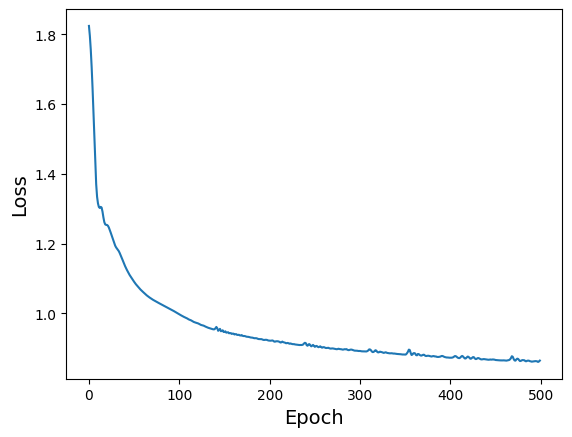

In [69]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [70]:
# Evaluate the model on the test data
with torch.no_grad(): #Turn off back propagation
    y_val = model_2.forward(X_test_nn)
    loss = criterion(y_val, y_test_nn)
    print(f'Loss on test data: {loss}')

# Evaluate the model on validation data
with torch.no_grad(): #Turn off back propagation
    y_val = model_2.forward(Xv_nn)
    loss = criterion(y_val, yv_nn)
    print(f'Loss on validation data: {loss}')

Loss on test data: 1.0542751550674438
Loss on validation data: 0.8600906729698181


In [71]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test_nn):
        y_val = model_2.forward(data)
        
        print(f'{i+1}.) {str(y_val)} \t {y_test_nn [i]}')
        
        # Check if the predicted class is correct
        if y_val.argmax().item() == y_test_nn[i]:
            correct += 1

1.) tensor([-5.2350, -3.7505, -0.7098,  2.6336,  2.6528,  0.9204, -2.9550]) 	 4
2.) tensor([-7.6244, -8.4712, -3.3706,  4.5214,  3.4831,  3.4830, -1.2242]) 	 4
3.) tensor([ -6.8286,  -2.5081,   4.2811,   5.2938,   0.5300,  -3.2122, -12.6015]) 	 3
4.) tensor([-5.8988, -1.8982,  1.0811,  3.1228,  2.3119, -1.1447, -7.6821]) 	 3
5.) tensor([ -5.2755,  -0.7318,   4.6347,   4.2963,   0.4172,  -4.0065, -12.0791]) 	 2
6.) tensor([-3.5817, -2.7893, -0.8579,  1.5731,  2.1339,  1.0141, -0.8326]) 	 4
7.) tensor([-3.0685, -0.7756,  3.1152,  3.1859, -0.1389, -3.0121, -7.7060]) 	 3
8.) tensor([ -1.1429,   2.4338,   5.9501,   4.2221,  -1.9114,  -7.7362, -14.0958]) 	 2
9.) tensor([ -3.0507,   0.7641,   4.4025,   3.9827,  -0.7878,  -5.3286, -12.1044]) 	 2
10.) tensor([-6.2419, -1.7515,  2.4534,  3.4666,  2.3477, -1.8370, -9.0931]) 	 3
11.) tensor([-3.8847,  0.1211,  3.7019,  2.5362,  0.8522, -2.9251, -8.3213]) 	 2
12.) tensor([-5.3435, -2.0899,  2.2172,  3.3351,  1.7099, -1.5554, -7.5552]) 	 3
13.) tens

In [72]:
print(f'We got {correct} out of 1625 correct')

# Calculate model accuracy score
accuracy = (correct / len(y_test_nn)*100)
print(f'Accuracy of Neural Network with best Hyperparameters: {accuracy:.2f}%')

We got 920 out of 1625 correct
Accuracy of Neural Network with best Hyperparameters: 56.62%
